# Covid-19 Traffic VS Daily New Cases Data Exploration

I happened to learn that Apple has made its mobility data available to aid COVID-19 efforts, which is "Aggregated Navigation Data from Apple Maps Provides Mobility Trends for Cities and Countries or Regions". I've always have the assumed that more traffice will lead to more new cases of Covid-19, as it means that people are not 'staying at home being isolated', it leads to more opportunities for the virus to spread. As I will also need data for the daily new cases, I did a quick search and found that WHO (World Health Organization) offers the data online conveniently available. So I downloaded these to datasets from Apple and WHO.

# Line Plot Visualization Technique

As I need to show data changes over time, a line plot can easily be used to fulfill that purpose. Also, it's good to show a good impression of trends and changes, which is something we will like to see in this setting.

In this notebook, I will be using line plots to plot both the daily traffic and new cases reported in a few selected countries.

Line plot does have its limiatations like:
Plotting too many lines over the graph makes it cluttered and confusing to read.
A wide range of data is challenging to plot over a line graph.
They are only ideal for representing data made of total figures such as values of total rainfall in a month.

However, in this data exploration line plots would work quite well.
___

# Considerations for Library Selection - Seaborn
Seaborn is a open source library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

We've learned about matplotlib in this course, and were given a quick taste of Seaborn, I did some quick search about Seaborn and find the following words:
"If matplotlib “tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too."
I found this to be a pretty good summary of Seaborn's strength, and it's really handy for data exploration.

Seaborn is created by Michael Waskom, Postdoc in the Center for Neural Science at NYU. Creator of http://seaborn.pydata.org. Decision-making researcher and data aesthete.


# Installing Seaborn

Installation requires numpy, scipy, pandas, and matplotlib. Some functions will optionally use statsmodels if it is installed.
Seaborn supports Python 3.6+ and no longer supports Python 2.

#### The latest stable release (and older versions) can be installed from PyPI::

$ pip install seaborn

# Import Libraries
The following libraries will be used for data cleaning and visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# Collecting and Cleaning Data

I have downloaded both datasets in csv format and saved them in the current working directory.

Somehow, Apply announces that "Data for May 11-12 is not available and will appear as blank columns in the data set." from Apple's data set, so these dates have to be taken out so the lines won't break on the chart.

In [2]:
import os
cwd = os.getcwd()
cwd

'f:\\UMICH\\SIADS 591 Milestone I\\SIADS591_Project'

In [3]:
# First let's read in the traffice data from Apple, and take a quick look at it
apple_data_raw = pd.read_csv('./data/applemobilitytrends-2021-05-07.csv')
print(apple_data_raw.head(), apple_data_raw.shape)

         geo_type     region transportation_type alternative_name sub-region  \
0  country/region    Albania             driving              NaN        NaN   
1  country/region    Albania             walking              NaN        NaN   
2  country/region  Argentina             driving              NaN        NaN   
3  country/region  Argentina             walking              NaN        NaN   
4  country/region  Australia             driving               AU        NaN   

  country  2020-01-13  2020-01-14  2020-01-15  2020-01-16  ...  2021-04-28  \
0     NaN       100.0       95.30      101.43       97.20  ...      105.82   
1     NaN       100.0      100.68       98.93       98.46  ...      137.44   
2     NaN       100.0       97.07      102.45      111.21  ...       62.91   
3     NaN       100.0       95.11      101.37      112.67  ...       57.93   
4     NaN       100.0      102.98      104.21      108.63  ...      115.54   

   2021-04-29  2021-04-30  2021-05-01  2021-05-02 

In [4]:
# It seems that this data has multiple levels of details with it's 'geo_type' key, let's take a look at it.
apple_data_raw['geo_type'].unique()

array(['country/region', 'city', 'sub-region', 'county'], dtype=object)

In [5]:
# It turned out that the 'country/region' is the highest level which contains the Country level data we wanted.
# So let's create a new dataframe with this level only.
# And then drop the columns that are not needed, ['geo_type','alternative_name','sub-region','country']

traffic_data = apple_data_raw[apple_data_raw['geo_type']=='country/region']
traffic_data = traffic_data.drop(columns=['geo_type','alternative_name','sub-region','country'])

In [6]:
# A quick check
traffic_data.head()

region transportation_type  2020-01-13  2020-01-14  2020-01-15  \
0    Albania             driving       100.0       95.30      101.43   
1    Albania             walking       100.0      100.68       98.93   
2  Argentina             driving       100.0       97.07      102.45   
3  Argentina             walking       100.0       95.11      101.37   
4  Australia             driving       100.0      102.98      104.21   

   2020-01-16  2020-01-17  2020-01-18  2020-01-19  2020-01-20  ...  \
0       97.20      103.55      112.67      104.83       94.39  ...   
1       98.46      100.85      100.13       82.13       95.65  ...   
2      111.21      118.45      124.01       95.44       95.13  ...   
3      112.67      116.72      114.14       84.54      101.37  ...   
4      108.63      109.08       89.00       99.35      103.53  ...   

   2021-04-28  2021-04-29  2021-04-30  2021-05-01  2021-05-02  2021-05-03  \
0      105.82      111.41      135.23      182.13      172.62      145.75   
1      137.44      129.98      155.35      169.47      145.97      166.57   
2       62.91       65.26       81.98       78.80       52.41       54.14   
3       57.93       59.52       68.79       58.44       40.26       48.24   
4      115.54      124.86      130.17      104.93      101.50      107.43   

   2021-05-04  2021-05-05  2021-05-06  2021-05-07  
0      138.43      132.24      135.06      147.77  
1      162.26      153.39      154.46      172.67  
2       58.74       61.20       65.18       81.05  
3       53.56       56.22       59.23       69.96  
4      109.24      112.59      120.96      130.43  

[5 rows x 483 columns]

In [7]:
# The data has 3 kinds of traffice info, walking, driving and transit, and as it turns out that
# not all countries have all 3 kinds of traffice info. So an easy way to deal with that will be
# to just group the data by region and take the mean value of it.

traffic_data = traffic_data.groupby('region').mean()
traffic_data.shape

(63, 481)

In [8]:
# A quick check
traffic_data.head()

2020-01-13  2020-01-14  2020-01-15  2020-01-16  2020-01-17  \
region                                                                  
Albania         100.0   97.990000  100.180000   97.830000  102.200000   
Argentina       100.0   96.090000  101.910000  111.940000  117.585000   
Australia       100.0  102.023333  102.223333  104.243333  107.050000   
Austria         100.0  101.345000  104.915000  112.225000  120.295000   
Belgium         100.0  100.440000  107.646667  110.800000  123.343333   

           2020-01-18  2020-01-19  2020-01-20  2020-01-21  2020-01-22  ...  \
region                                                                 ...   
Albania    106.400000   93.480000   95.020000   95.925000   94.450000  ...   
Argentina  119.075000   89.990000   98.250000  100.770000  101.285000  ...   
Australia   92.070000   99.263333  105.066667  108.146667  106.103333  ...   
Austria    124.135000   97.550000  100.650000  102.985000  104.805000  ...   
Belgium    135.013333  104.976667  104.790000  110.530000  114.663333  ...   

           2021-04-28  2021-04-29  2021-04-30  2021-05-01  2021-05-02  \
region                                                                  
Albania    121.630000  120.695000  145.290000  175.800000  159.295000   
Argentina   60.420000   62.390000   75.385000   68.620000   46.335000   
Australia  100.790000  108.410000  121.653333   99.173333   89.486667   
Austria     86.765000   87.525000   88.310000   80.200000   74.400000   
Belgium    108.993333  101.736667  111.156667  104.293333   98.036667   

           2021-05-03  2021-05-04  2021-05-05  2021-05-06  2021-05-07  
region                                                                 
Albania    156.160000  150.345000  142.815000  144.760000  160.220000  
Argentina   51.190000   56.150000   58.710000   62.205000   75.505000  
Australia   91.950000   95.376667   97.243333  104.710000  119.006667  
Austria     93.280000   96.810000   91.785000   94.595000   94.715000  
Belgium    102.893333  100.246667  107.550000  105.843333  116.893333  

[5 rows x 481 columns]

In [9]:
# df2 = traffic_data.copy()

In [10]:
# df2.loc['Country_Average'] = df2.mean()

In [11]:
# df2.tail()

In [12]:
# Transform the data into long form for easier plotting

traffic_data = traffic_data.reset_index().melt('region')

In [13]:
# A quick check here.
traffic_data.head()

region    variable  value
0    Albania  2020-01-13  100.0
1  Argentina  2020-01-13  100.0
2  Australia  2020-01-13  100.0
3    Austria  2020-01-13  100.0
4    Belgium  2020-01-13  100.0

In [14]:
# Rename the columns for easier understanding
traffic_data.columns=['Country','Date','Traffic']

In [15]:
# Check to see if the 'Date' column is in the right format
traffic_data['Date'].dtype

dtype('O')

In [16]:
# Convert the 'Date' into Pandas's date dtype
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])

In [17]:
# Check the dtype again
traffic_data['Date'].dtype

dtype('<M8[ns]')

In [18]:
# A quick check
traffic_data.head()

Country       Date  Traffic
0    Albania 2020-01-13    100.0
1  Argentina 2020-01-13    100.0
2  Australia 2020-01-13    100.0
3    Austria 2020-01-13    100.0
4    Belgium 2020-01-13    100.0

In [19]:
# Seems we've cleaned up the data, now we just need to pick the countries in interest

Country_in_Interest = ['Canada', 'France', 'Germany', 'United Kingdom', 'United States', 'Italy', 'Japan']

In [20]:
# Let's filter the df into only the countries that we wanted to see
# And take out the dates that Apple data are missing

traffic_data = traffic_data[traffic_data['Country'].isin(Country_in_Interest)]
traffic_data = traffic_data[~traffic_data['Date'].isin(['2020-05-11','2020-05-12'])]

## Let's do a quick plot and take a quick look at our traffic data

It seems that most countries have a similar pattern, except Japen that have a higher traffice between March and April 2020 when compared to the rest of the countries

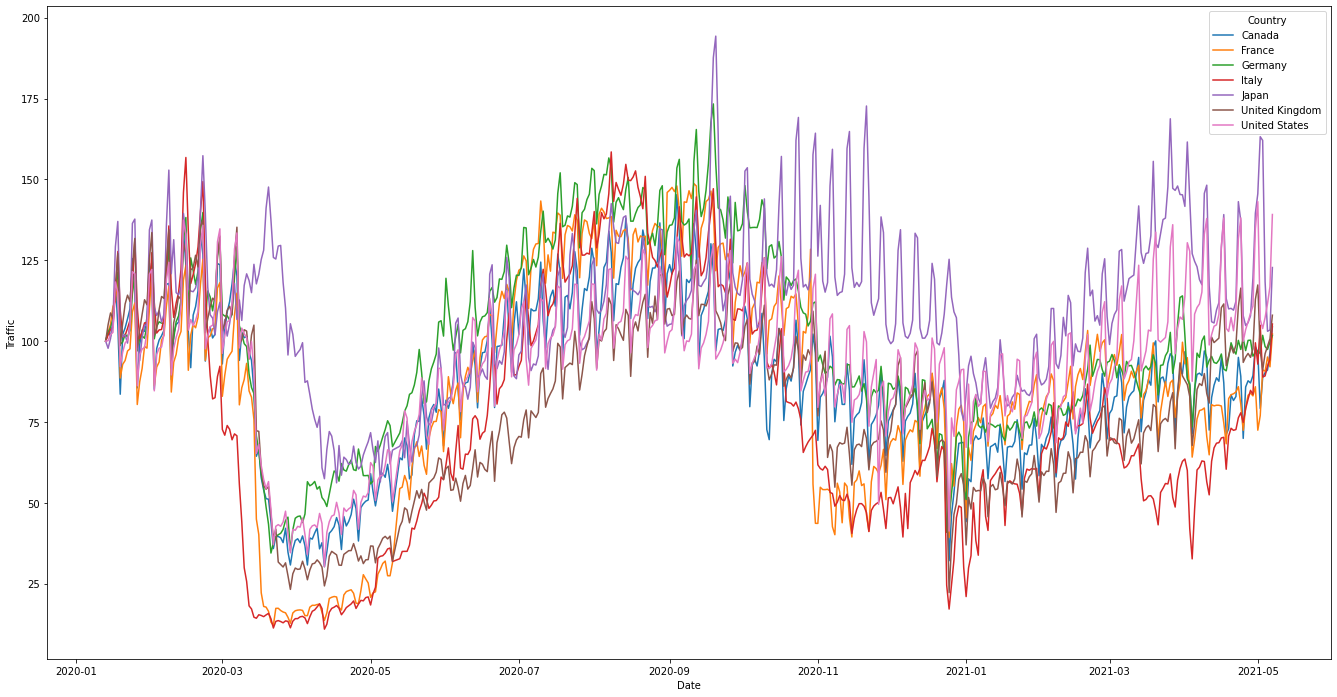

In [21]:
fig, ax = plt.subplots(figsize=(23,12))
sns.lineplot(x=traffic_data['Date'], y = traffic_data['Traffic'], hue = traffic_data['Country'], ax = ax);

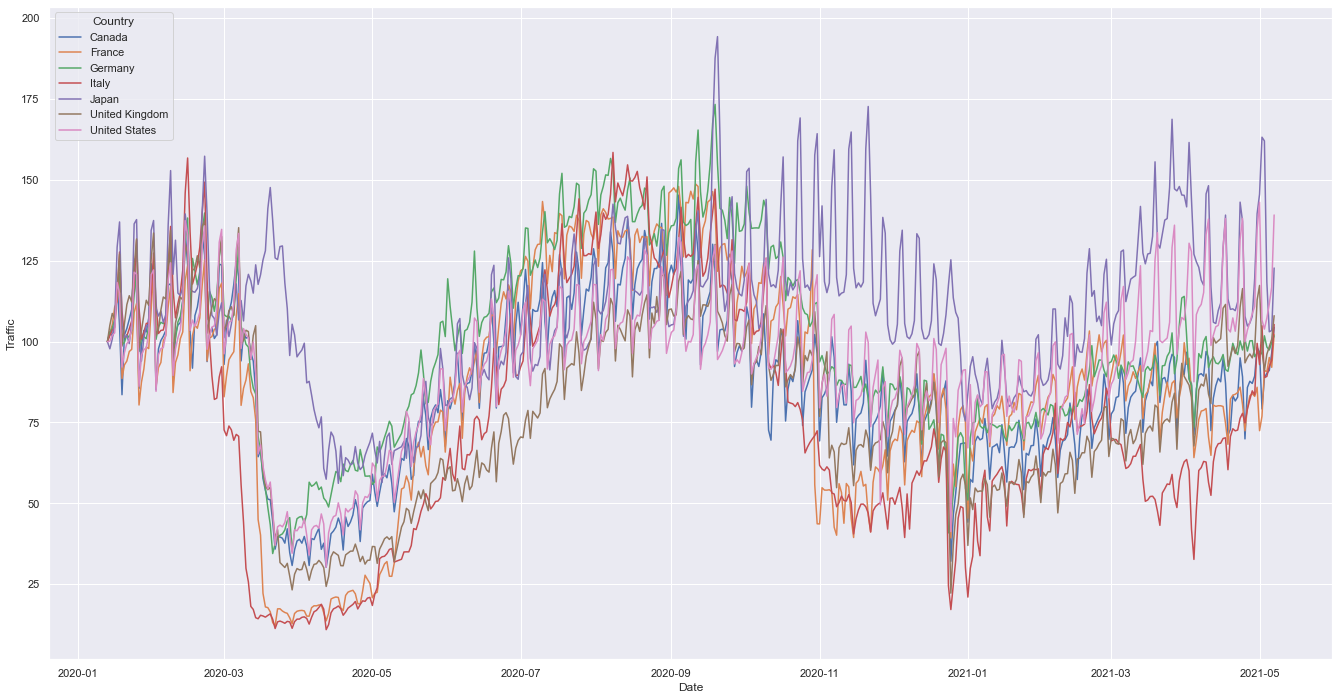

In [22]:
# It seems that we don't yet have the Seaborn these setup, let's setup the theme and plot again

sns.set_theme()
fig, ax = plt.subplots(figsize=(23,12))
sns.lineplot(x=traffic_data['Date'], y = traffic_data['Traffic'], hue = traffic_data['Country'], ax = ax);

In [23]:
# We then move on to the data from WHO
who_data_raw = pd.read_csv('./data/WHO-COVID-19-global-data.csv')
who_data_raw.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [24]:
# It just so happened that there is a space at the beginning of the column names.
who_data_raw.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [25]:
# Since we would only wanted to see the new cases reported daily, we will drop the other columns.
who_data = who_data_raw.drop(columns=['Country_code','WHO_region','Cumulative_cases','New_deaths','Cumulative_deaths'])

In [26]:
# A quick check
who_data.columns

Index(['Date_reported', 'Country', 'New_cases'], dtype='object')

In [27]:
# Rename the columns and convert the Date column into the proper dtype
who_data.columns = ['Date', 'Country', "Cases"]
who_data['Date']=pd.to_datetime(who_data['Date'])
who_data['Date'].dtype

dtype('<M8[ns]')

In [28]:
# A quick check
who_data.head()

Date      Country  Cases
0 2020-01-03  Afghanistan      0
1 2020-01-04  Afghanistan      0
2 2020-01-05  Afghanistan      0
3 2020-01-06  Afghanistan      0
4 2020-01-07  Afghanistan      0

In [29]:
# Let's take a quick look at the country names and see if there are any discrepancies
who_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

In [30]:
# It turns out that UK and USA are different and so we need to make some adjustments here
Country_dic = {'The United Kingdom':'United Kingdom', 'United States of America':'United States'}
who_data['Country'] = who_data['Country'].replace(Country_dic)

In [31]:
# Then we can move on to get to our countries in interest
who_data = who_data[who_data['Country'].isin(Country_in_Interest)]
who_data['Country'].unique()

array(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'], dtype=object)

In [32]:
# A quick check
who_data.head()

Date Country  Cases
18204 2020-01-03  Canada      0
18205 2020-01-04  Canada      0
18206 2020-01-05  Canada      0
18207 2020-01-06  Canada      0
18208 2020-01-07  Canada      0

In [33]:
# Also, it happens that WHO's data has a few more days than the Apple data and we will need to take out the 
# 2 missing days in Apples data as well
# So and easy way is to sync WHO's date data with the Apple's
who_data = who_data[who_data['Date'].isin(traffic_data['Date'].unique())]

In [34]:
# A quick check
who_data.head()

Date Country  Cases
18214 2020-01-13  Canada      0
18215 2020-01-14  Canada      0
18216 2020-01-15  Canada      0
18217 2020-01-16  Canada      0
18218 2020-01-17  Canada      0

In [35]:
# Okay, now we can merge the 2 df into our final df
# Note that we need it to be joined on both 'Country' and 'Date'
finaldf = pd.merge(traffic_data,who_data, on=['Country','Date'])

In [36]:
# A quick check
finaldf.head()

Country       Date  Traffic  Cases
0   Canada 2020-01-13    100.0      0
1   France 2020-01-13    100.0      0
2  Germany 2020-01-13    100.0      0
3    Italy 2020-01-13    100.0      0
4    Japan 2020-01-13    100.0      0

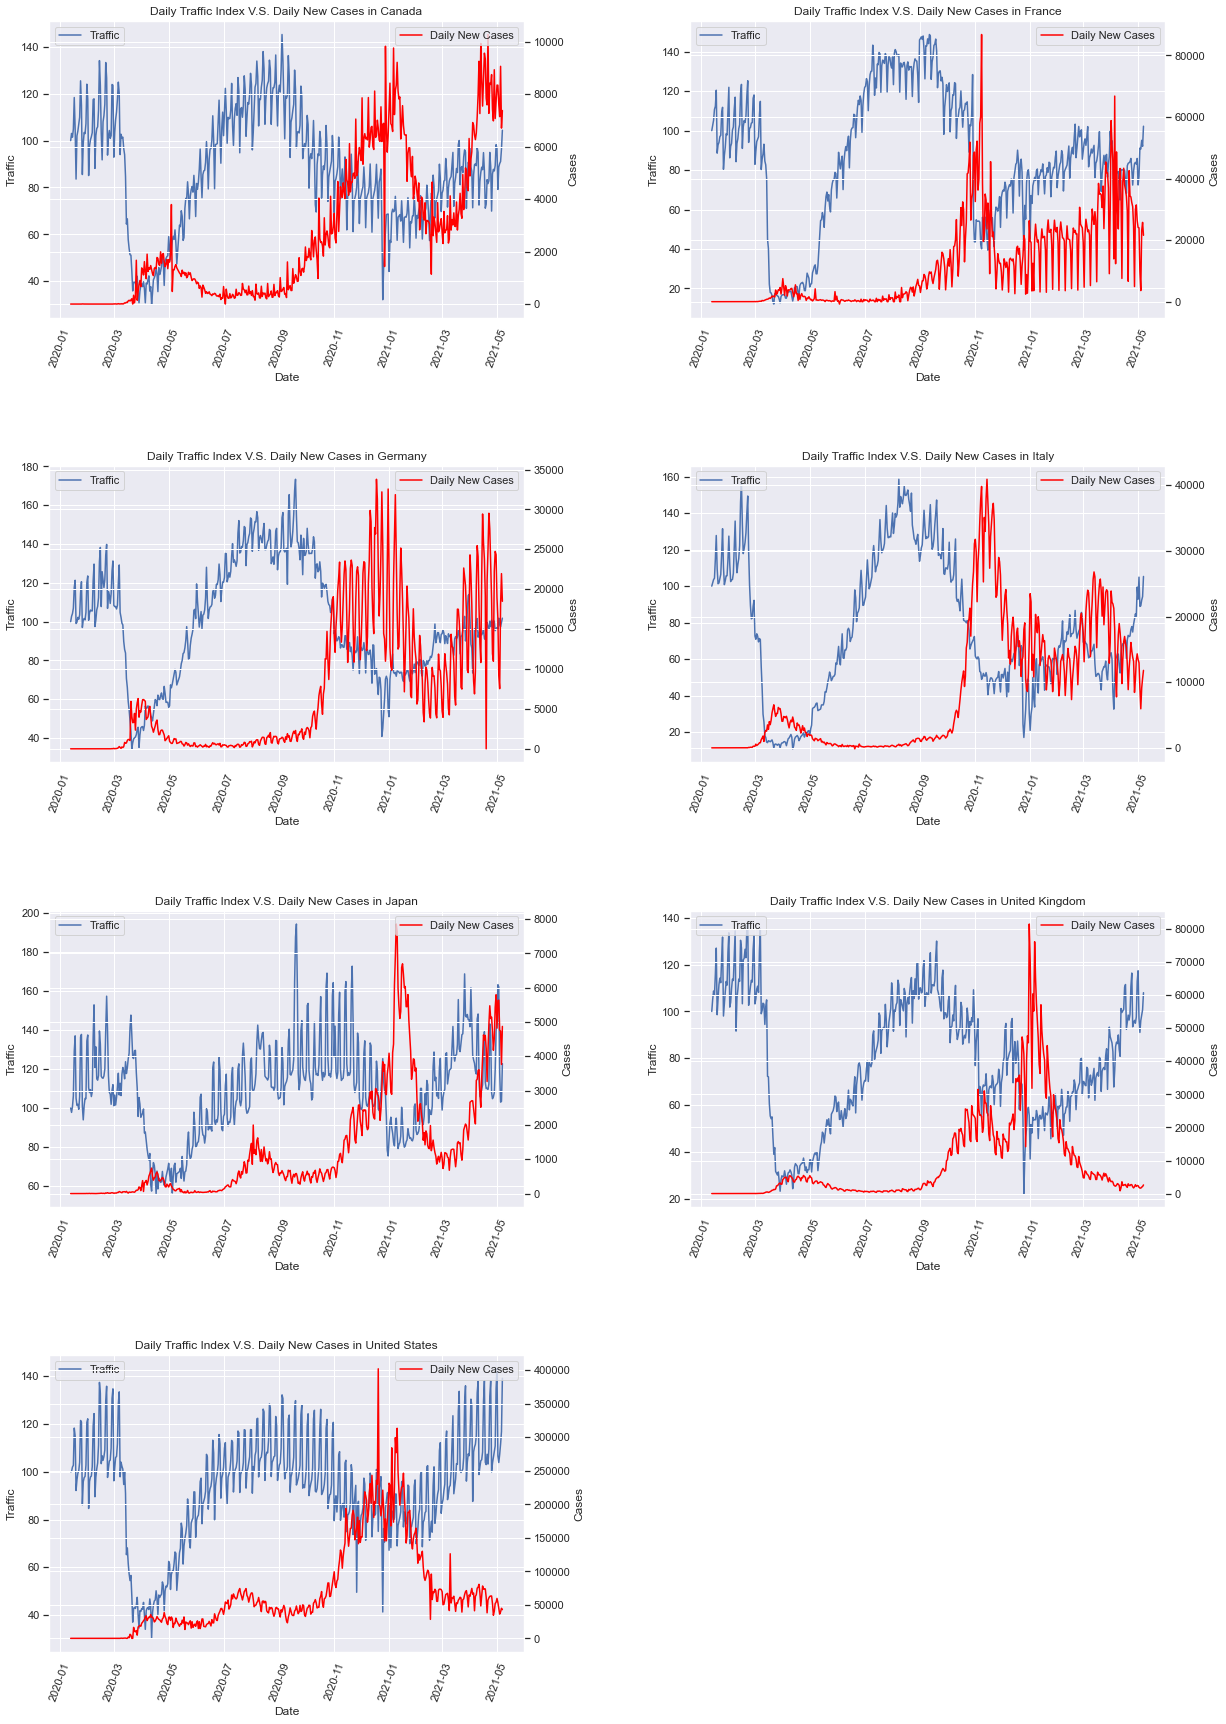

In [37]:
# Now, since we've got 7 countries in the list, let's plot our data into a 4x2
i=1
for country in finaldf['Country'].unique():
    df = finaldf[finaldf['Country']==country]
    fig = plt.gcf()
    fig.set_size_inches(20, 30)
    ax = fig.add_subplot(4, 2, i)

    sns.lineplot(x=df['Date'],y=df['Traffic'], ax=ax, label='Traffic', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=df['Date'],y=df['Cases'], ax=ax2, color='red', label = 'Daily New Cases', legend=False)
    
    ax.set_title('Daily Traffic Index V.S. Daily New Cases in {}'.format(country))
    plt.gcf().subplots_adjust(hspace=0.5, wspace=0.35)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
    ax.legend(loc='upper left')
    ax2.legend(loc = 'upper right')
    i+=1

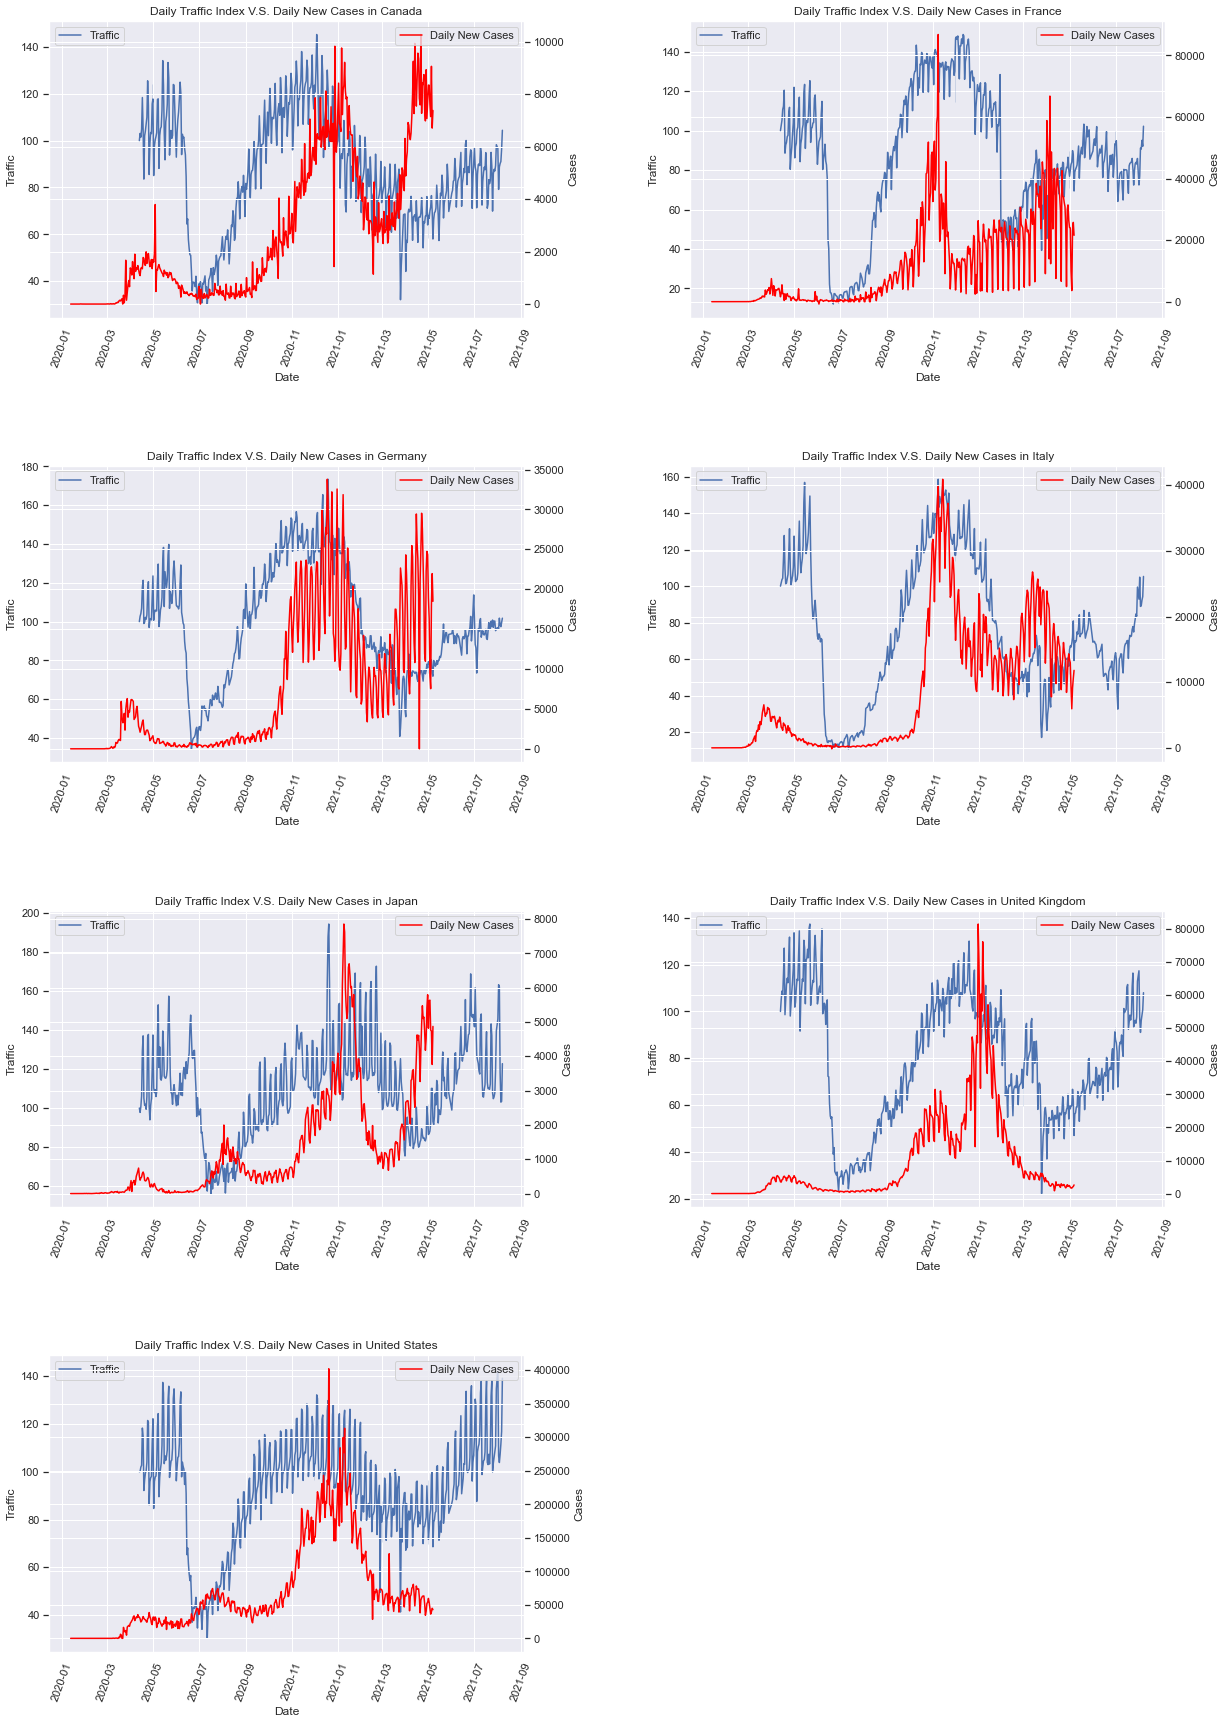

In [38]:
# I've always have the assumed that more traffice will lead to more new cases of Covid-19, 
# as it means that people are not 'staying at home being isolated', it leads to more opportunities for the virus to spread.
# With that, I would expect new cases to rise following the rise of the traffic
# From the charts above, it seems that the new cases seems to rise abouth 3 months after the rising of the traffic
# Let's add a 3 month to our traffic data and see if that is the case

plus_month_period=3
i=1
for country in finaldf['Country'].unique():
    df = finaldf[finaldf['Country']==country]
    fig = plt.gcf()
    fig.set_size_inches(20, 30)
    ax = fig.add_subplot(4, 2, i)
    i+=1
    sns.lineplot(x=df['Date']+pd.DateOffset(months=plus_month_period),y=df['Traffic'], ax=ax, label='Traffic', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=df['Date'],y=df['Cases'], ax=ax2, color='red', label = 'Daily New Cases', legend=False)
    
    ax.set_title('Daily Traffic Index V.S. Daily New Cases in {}'.format(country))
    plt.gcf().subplots_adjust(hspace=0.5, wspace=0.35)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
    ax.legend(loc='upper left')
    ax2.legend(loc = 'upper right')

## Just for fun, let's explore the data using Seaborn's jointplot

This function, jointplot, provides a convenient interface to the JointGrid class (where, with JointGrid.plot(), you can specify the plot for both the marginal and the main plot), with several canned plot kinds.

The jointplot offers the histgrams of both 'Traffic' and 'Cases"  on the margin and a scatterplot at the center.

However, I can't find a strong pattern from these plots.

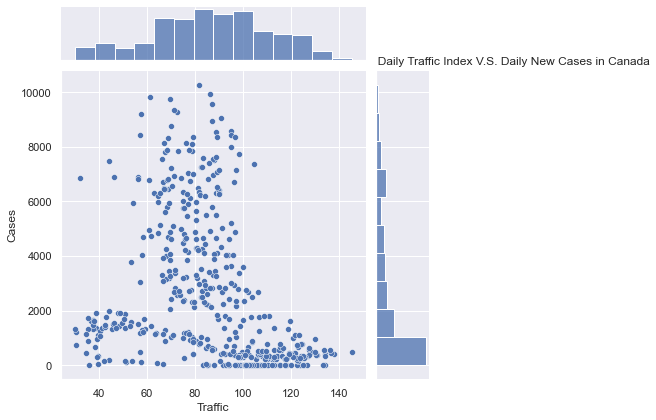

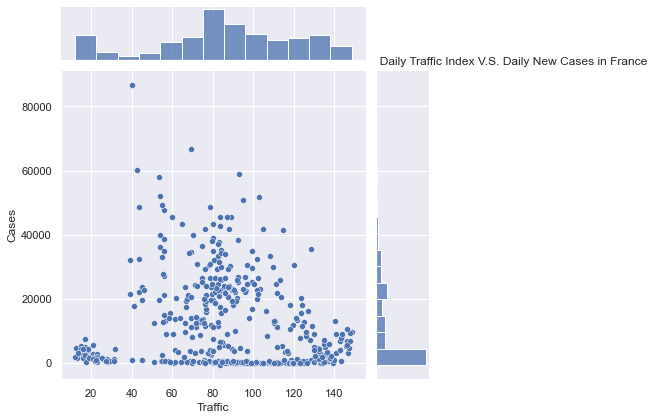

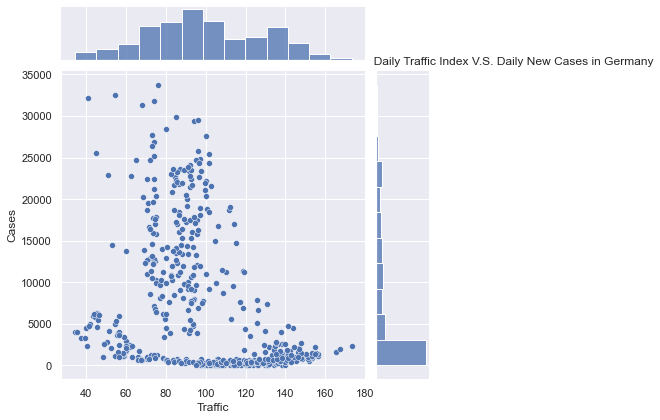

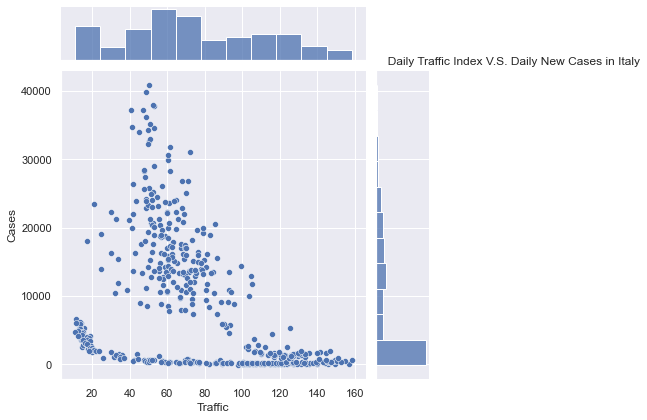

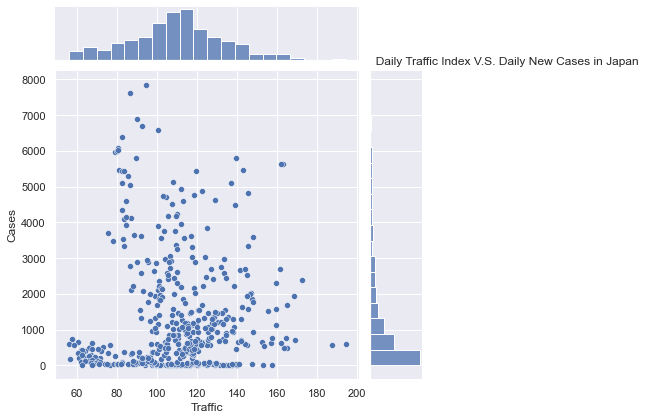

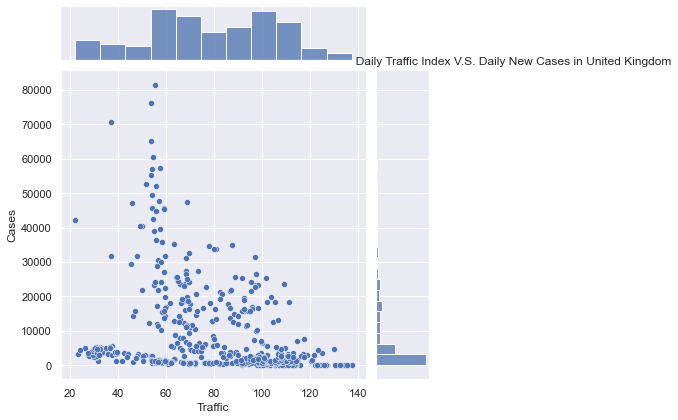

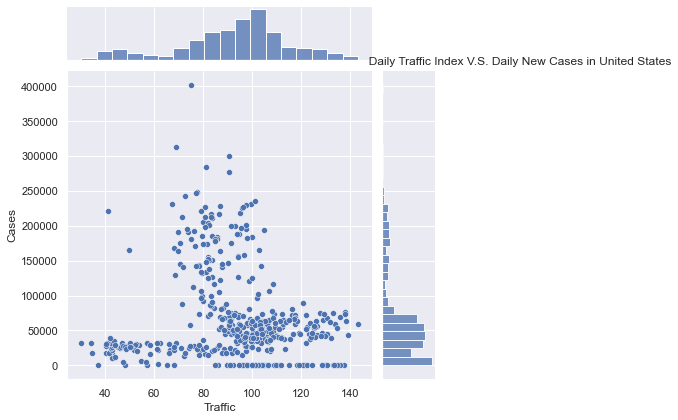

In [39]:
i = 1
for country in finaldf['Country'].unique():
    df = finaldf[finaldf['Country']==country]
#     fig = plt.gcf()
#     fig.set_size_inches(5, 10)
#     ax = fig.add_subplot(4, 2, i)
    p = sns.jointplot(data=df, x='Traffic',y='Cases')
    ax=plt.gca()
    ax.set_title('                                                                  Daily Traffic Index V.S. Daily New Cases in {}'.format(country))

## Further fine tuning with widgets (IntSlider)

Back to the line plots, although each country might be a bit different, it does seems that the daily reported new cases and the traffic follow a similar trend given some offsets on the traffic date data.

So let's put in a slider which makes exploring the data by adjusting the offset much easier.

And for finer tuning, we will use 'day' instead of 'month' in this slider. I will use +100 days as default, but offers a -180 to +180 days offset available.

### PS: Somehow the plotting below will not be shown once exported into pdf. But it works perfectly in Jupyter Notebook.

In [40]:
# To allow further fine tuning of the date offset,
# we can use days as the unit and utilize the interact slider in ipywidgets

import ipywidgets as widgets
from ipywidgets import interact

@interact(plus_day_period = widgets.IntSlider(
    value = 100,
    min=-180,
    max=180,
    step=1,
    description='Days to Offset:',
    style = {'description_width': 'initial'},
    disabled=False,
    continuous_updaet=False,
    orientation = 'horizontal',
    readout=True,
    readout_format = 'd',
)
)

def plotting(plus_day_period):
    i=1
    for country in finaldf['Country'].unique():
        df = finaldf[finaldf['Country']==country]
        fig = plt.gcf()
        fig.set_size_inches(20, 30)
        ax = fig.add_subplot(4, 2, i)
        i+=1
        sns.lineplot(x=df['Date']+pd.DateOffset(days=plus_day_period),y=df['Traffic'], ax=ax, label='Traffic', legend=False)
        ax2 = ax.twinx()
        sns.lineplot(x=df['Date'],y=df['Cases'], ax=ax2, color='red', label = 'Daily New Cases', legend=False)

        ax.set_title('Daily Traffic Index V.S. Daily New Cases in {}'.format(country))
        plt.gcf().subplots_adjust(hspace=0.5, wspace=0.35)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
        ax.legend(loc='upper left')
        ax2.legend(loc = 'upper right')

interactive(children=(IntSlider(value=100, description='Days to Offset:', max=180, min=-180, style=SliderStyle…

## Summary

After adding some offset to the traffic dates, although each country might be a bit different, it does seems that, despite of all the efforts in place like social distancing, masks and hand sanitizers, once people starts to be more 'active', the virus starts to spread more quickly. 

---
# Record Dependencies
Below are the dependencies for this notebook

In [42]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,ipywidgets,seaborn

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.22.0

pandas    : 1.2.4
numpy     : 1.20.1
ipywidgets: 7.6.3
seaborn   : 0.11.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

